In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

data_frames = []

files = os.listdir('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data')
print(str(files))
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'+file)
        df = pd.read_csv(file_path)
        data_frames.append(df)
total_data = pd.concat(data_frames)
total_data.to_csv('sales-data.csv',index=False)
total_data.shape

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


(186850, 6)

Add Month column to total_data

In [3]:
total_data = total_data[total_data['Order Date'].str[0:2] != 'Or']
total_data = total_data.dropna()

Data Munging

In [4]:
total_data['Month'] = total_data['Order Date'].str[0:2]
total_data['Month'] = total_data['Month'].astype('int32')
total_data['Quantity Ordered'] = pd.to_numeric(total_data['Quantity Ordered'])
total_data['Price Each'] = pd.to_numeric(total_data['Price Each'])
total_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Which Month has highest sales

In [5]:
# Creating a sales column in total_data dataframe and find best month for sales
total_data['sales'] = total_data['Quantity Ordered'] * total_data['Price Each']
total_data.groupby('Month').sum()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
Month,,,,,,,
1,2971502978172978172979692983442990492991253003...,Lightning Charging CableiPhoneLightning Chargi...,10903,1811768.38,01/01/20 00:3801/01/20 00:2201/01/20 00:2201/0...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1822256.73
2,1505021505031505041505051505061505071505081505...,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13449,2188884.72,02/18/19 01:3502/13/19 07:2402/18/19 09:4602/0...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2202022.42
3,1505331505411508121517491520361532841535441538...,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,17005,2791207.83,03/01/19 03:0603/01/19 01:0303/01/19 02:1803/0...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2807100.38
4,1765581765591765601765601765611765621765631765...,USB-C Charging CableBose SoundSport Headphones...,20558,3367671.02,04/19/19 08:4604/07/19 22:3004/12/19 14:3804/1...,"917 1st St, Dallas, TX 75001682 Chestnut St, B...",3390670.24
5,1769781775511777781777781790761790761791341800...,Apple Airpods Headphones27in FHD MonitoriPhone...,18667,3135125.13,05/01/19 03:2905/01/19 00:1305/01/19 00:4805/0...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3152606.75
6,2099212099222099232099242099252099262099272099...,USB-C Charging CableMacbook Pro LaptopThinkPad...,15253,2562025.61,06/23/19 19:3406/30/19 10:0506/24/19 20:1806/0...,"950 Walnut St, Portland, ME 0410180 4th St, Sa...",2577802.26
7,2229102229112229122229132229142229152229162229...,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16072,2632539.56,07/26/19 16:5107/05/19 08:5507/29/19 12:4107/2...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2647775.76
8,2366702366712366722366732366742366752366762366...,Wired HeadphonesBose SoundSport HeadphonesiPho...,13448,2230345.42,08/31/19 22:2108/15/19 15:1108/06/19 14:4008/2...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2244467.88
9,2388342392852406362410542423432428652436672449...,Apple Airpods Headphones34in Ultrawide Monitor...,13109,2084992.09,09/01/19 04:1309/01/19 01:0909/01/19 02:0709/0...,"761 Forest St, San Francisco, CA 94016373 1st ...",2097560.13


Which City had best sales in 2021 ?

In [6]:
total_data['city'] = total_data['Purchase Address'].str.split(',',expand=True).iloc[:,1].fillna('')
total_data.groupby('city')['sales'].sum()

city
 Atlanta          2795498.58
 Austin           1819581.75
 Boston           3661642.01
 Dallas           2767975.40
 Los Angeles      5452570.80
 New York City    4664317.43
 Portland         2320490.61
 San Francisco    8262203.91
 Seattle          2747755.48
Name: sales, dtype: float64

In [7]:
total_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [8]:
total_data['Order Date'] = pd.to_datetime(total_data['Order Date'])
# print(type(total_data['Order Date']))
total_data.head()

C:\Users\Hp Pro 612\AppData\Local\Temp\ipykernel_6628\382373206.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total_data['Order Date'] = pd.to_datetime(total_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [9]:
total_data['hour'] = total_data['Order Date'].dt.hour
total_data['minute'] = total_data['Order Date'].dt.minute
total_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales,city,hour,minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27


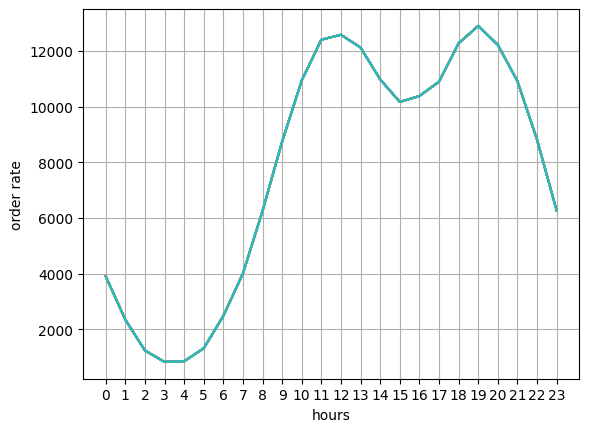

In [14]:
hours = [hour for hour, df in total_data.groupby('hour')]
plt.plot(hours, total_data.groupby(['hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('hours')
plt.ylabel('order rate')
plt.show()